In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [4]:
class DecisionTree:
    def __init__(self,max_depth = 10,min_split = 2):
        self.max_depth = max_depth
        self.min_split = min_split

    def fit(self,X,y):
        self.labels = np.unique(y)
        self.root = self.constructTree(X,y,0)

    def predict(self,X):
        ypred = []
        for i in range(len(X)):
            p = self.predict1(X[i],self.root)
            lb = self.labels[np.argmax(p)]
            ypred.append(lb)

        return np.array(ypred)

    def predict1(self,t,node):
        if node['isLeaf'] == True:
            return node['prediction']
        elif t[node['Feature']] < node['Threshold']:
            return self.predict1(t,node['Left'])
        else:
            return self.predict1(t,node['Right'])
            

    def constructTree(self,X,y,curDepth=0):
        if len(X) == 0 or curDepth > self.max_depth:
            return None
        
        if len(X) >= self.min_split:
            parentEntropy = self.entropy(y)
            weightedChildEntropy = []
            for feat in range(X.shape[1]):
                th = X[:,feat].mean()
                wce = 0
                wce += np.mean(X[:,feat] < th)*self.entropy(y[X[:,feat]<th])
                wce += np.mean(X[:,feat] >= th)*self.entropy(y[X[:,feat]>=th])
                weightedChildEntropy.append(wce)

            InformationGain = parentEntropy-np.array(weightedChildEntropy)
            feat = np.argmax(InformationGain)
            th = X[:,feat].mean()

            node = {
                "Feature" : feat,
                "Threshold" : th,
                "Left" : None,
                "Right" : None,
                "isLeaf" : False
            }

            LSpx,RSpx = X[X[:,feat] < th], X[X[:,feat] >= th]
            LSpy,RSpy = y[X[:,feat] < th], y[X[:,feat] >= th]

            node['Left'] = self.constructTree(LSpx,LSpy,curDepth+1)
            node['Right'] = self.constructTree(RSpx,RSpy,curDepth+1)

            if node['Left'] == None or node['Right'] == None:
                node['isLeaf'] = True

            if node['isLeaf'] == True:
                node['prediction'] = self.predictions(y)
                
            return node
        
        else:
            node = {
                "Feature" : None,
                "Threshold" : None,
                "Left" : None,
                "Right" : None,
                "isLeaf" : True,
                'prediction' : self.predictions(y)
            }
            
            return node
            
    def predictions(self,y):
        prob = np.zeros_like(self.labels,dtype='float32')
        for i in range(prob.shape[0]):
            prob[i] = (y == self.labels[i]).mean()

        return prob
            

    def entropy(self,y):
        values,counts = np.unique(y,return_counts=True)
        prob = counts/len(y)
        return -np.sum(prob*np.log2(prob))

In [5]:
# dt = DecisionTree()
# dt.entropy([1,2,3])

In [6]:
data = pd.read_csv('./Titanic.csv')

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
cols_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

In [9]:
data = data.drop(cols_drop, axis = 1)

In [10]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
lab_enc = LabelEncoder()
data['Sex'] = lab_enc.fit_transform(data['Sex'])
data['Embarked'] = lab_enc.fit_transform(data['Embarked'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [12]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [13]:
data = data.fillna(data['Age'].mean())

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [15]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
output_col = ['Survived']

X_data = data[input_cols]
Y_data = data['Survived']
X_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [16]:
print(X_data.shape, Y_data.shape)

(891, 7) (891,)


In [17]:
X_data = X_data.values
Y_data = Y_data.values

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data,train_size = 0.8)

In [43]:
# dt = DecisionTree(max_depth=7,min_split=10)
# dt = DecisionTreeClassifier(max_depth=100)
rf = RandomForestClassifier(100,max_depth=6)
rf.fit(x_train,y_train)
# dt.root

RandomForestClassifier(max_depth=6)

In [44]:
accuracy_score(y_train,rf.predict(x_train))

0.8848314606741573

In [45]:
accuracy_score(y_test,rf.predict(x_test))

0.8044692737430168

In [31]:
# dt.root

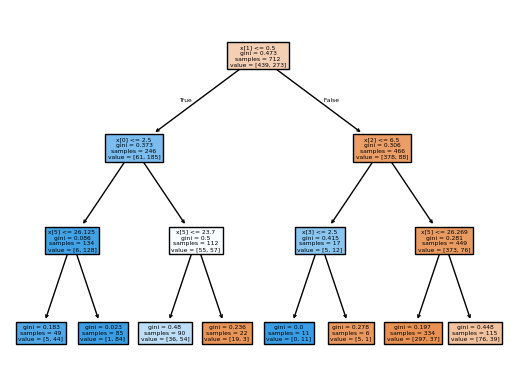

In [32]:
from sklearn import tree
import matplotlib.pyplot as plt
# plt.figure(figsize=(12,8))
tree.plot_tree(dt, filled=True)
plt.savefig('tree.jpg')
plt.show()